In [2]:
import sys
from pathlib import Path

p = Path.cwd().resolve()

# walk up until we find a folder that contains "ai_engine"
root = None
if (p / "ai_engine").exists():
    root = p
else:
    for parent in p.parents:
        if (parent / "ai_engine").exists():
            root = parent
            break

if root is None:
    raise RuntimeError(f"Could not find 'ai_engine' folder from: {p}")

sys.path.insert(0, str(root))
print("✅ Added to sys.path:", root)


✅ Added to sys.path: C:\Users\OLASQUARE\Desktop\GEN AI Works\Nigeria_Tax_Assistance_Agent


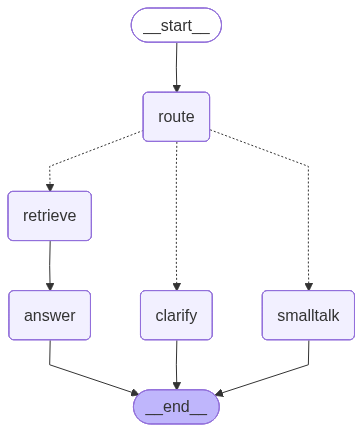

Saved: C:\Users\OLASQUARE\Desktop\GEN AI Works\Nigeria_Tax_Assistance_Agent\ai_engine\tax_engine\tax_graph.png


In [3]:
from pathlib import Path
from IPython.display import Image, display

from ai_engine.tax_engine.agent_graph import build_graph

app = build_graph()

g = app.get_graph()

# Try local Graphviz first (best if installed), otherwise Mermaid PNG
png_bytes = None
try:
    png_bytes = g.draw_png()
except Exception:
    png_bytes = g.draw_mermaid_png()

# Display in notebook
display(Image(png_bytes))

# Save to file
out = Path("tax_graph.png")
out.write_bytes(png_bytes)
print("Saved:", out.resolve())
